In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [2]:
def Raws(name):
    RAW = np.rot90(np.genfromtxt("{}.txt".format(name)),1)
    mean = np.mean(RAW)
    for i, fila in enumerate(RAW): 
        for j, elem in enumerate(fila): 
            if(elem ==0):
                RAW[i,j] = mean
    return RAW

In [3]:
def FF(name, numArchivos):
    FF=[]
    for j in range(numArchivos):
        if j<10:
            FF.append(np.genfromtxt("{}_0{}.txt".format(name,j)))
        if j>=10 and j<numArchivos:
            FF.append(np.genfromtxt("{}_{}.txt".format(name,j)))
    FFmean=np.zeros((len(FF[0]), len(FF[0])))
    for j in range(len(FF)):
        FFmean=FFmean+FF[j]
    FFmean=np.rot90(FFmean,1)
    mean = np.mean(FFmean)
    for i, fila in enumerate(FFmean): 
        for j, elem in enumerate(fila): 
            if(elem ==0):
                FFmean[i,j] = mean
    return FFmean

In [4]:
def RawsC(name1, name2, numArchivos):
    RAWC=(Raws(name1)/FF(name2, numArchivos))
    return RAWC

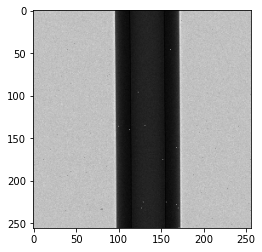

In [5]:
imagen = RawsC("Raw", "FF/FF", 59)
plt.imshow(imagen, cmap='gray')

Text(0.5, 0, 'Pixels')

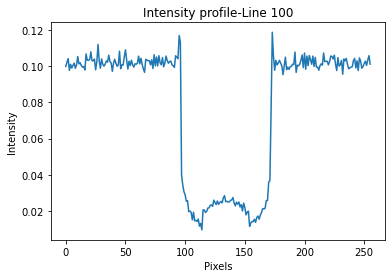

In [6]:
pp1=imagen[100,:]
plt.plot(pp1)
plt.title("Intensity profile-Line 100")
plt.ylabel("Intensity")
plt.xlabel("Pixels")

In [7]:
# Ahora miramos el algoritmo

In [8]:
import numpy as np

def fienup_phase_retrieval(mag, mask=None, beta=0.8, 
                           steps=200, mode='hybrid', verbose=True):
    """
    Implementation of Fienup's phase-retrieval methods. This function
    implements the input-output, the output-output and the hybrid method.
    
    Mode 'output-output' and beta=1 results in 
    the Gerchberg-Saxton algorithm.
    
    Parameters:
        mag: Measured magnitudes of Fourier transform
        mask: Binary array indicating where the image should be
              if padding is known
        beta: Positive step size
        steps: Number of iterations
        mode: Which algorithm to use
              (can be 'input-output', 'output-output' or 'hybrid')
        verbose: If True, progress is shown
    
    Returns:
        x: Reconstructed image
    """

    
    if mask is None:
        mask = np.ones(mag.shape)
        
    assert mag.shape == mask.shape, 'mask and mag must have same shape'
    
    # sample random phase and initialize image x 
    y_hat = mag*np.exp(1j*2*np.pi*np.random.rand(*mag.shape))
    x = np.zeros(mag.shape)
    
    # previous iterate
    x_p = None
        
    # main loop
    for i in range(1, steps+1):
        # show progress
        if i % 100 == 0 and verbose: 
            print("step", i, "of", steps)
        
        # inverse fourier transform
        y = np.real(np.fft.ifft2(y_hat))
        
        # previous iterate
        if x_p is None:
            x_p = y
        else:
            x_p = x 
        
        # updates for elements that satisfy object domain constraints
        if mode == "output-output" or mode == "hybrid":
            x = y
            
        # find elements that violate object domain constraints 
        # or are not masked
        indices = np.logical_or(np.logical_and(y<0, mask), 
                                np.logical_not(mask))
        
        # updates for elements that violate object domain constraints
        if mode == "hybrid" or mode == "input-output":
            x[indices] = x_p[indices]-beta*y[indices] 
        elif mode == "output-output":
            x[indices] = y[indices]-beta*y[indices] 
        
        # fourier transform
        x_hat = np.fft.fft2(x)
        
        # satisfy fourier domain constraints
        # (replace magnitude with input magnitude)
        y_hat = mag*np.exp(1j*np.angle(x_hat))
    return x

In [9]:
magnitudes = np.abs(np.fft.fft2(imagen))

In [12]:
#4000
result = fienup_phase_retrieval(magnitudes, beta=1, steps=1000, mode='output-output', verbose=True)

step 100 of 1000
step 200 of 1000
step 300 of 1000
step 400 of 1000
step 500 of 1000
step 600 of 1000
step 700 of 1000
step 800 of 1000
step 900 of 1000
step 1000 of 1000
